In [1]:
from CourseEA.CPreprocess import File
from CourseEA.CPreprocess import Data
from CourseEA.DataPreProcess import DataProcess

In [2]:
file = File("dataset/result/")
files_dir_list = file.get_files_dir_list()
files_dir_list
files_name_list = file.get_files_name_list()

In [3]:
dt = Data(files_dir_list)
dataset = dt.get_dataset()

In [4]:
dataProcess = DataProcess(dataset)

预计需要几分钟的加载时间。。。


W1020 12:27:21.073586 13096 utils_any2vec.py:354] duplicate word '--------------------------------------------------------------------------------------------------' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:24.328950 13096 utils_any2vec.py:354] duplicate word '--------------------------------------------------------------------------------------------------' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:30.300485 13096 utils_any2vec.py:354] duplicate word '--------------------------------------------------------------------------------------------------' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:34.617738 13096 utils_any2vec.py:354] duplicate word '--------------------------------------------------------------------------------------------------' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:36.220419 13096 utils_any2vec.py:354] duplicate word '----------------------------------------------

W1020 12:27:40.621745 13096 utils_any2vec.py:354] duplicate word '--------------------------------------------------------------------------------------------------' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:40.628730 13096 utils_any2vec.py:354] duplicate word '..................................................................................................' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:40.631721 13096 utils_any2vec.py:354] duplicate word '--------------------------------------------------------------------------------------------------' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:40.639697 13096 utils_any2vec.py:354] duplicate word '..................................................................................................' in embeddings/sgns.zhihu.bigram, ignoring all but first
W1020 12:27:40.640694 13096 utils_any2vec.py:354] duplicate word '----------------------------------------------

加载完成


In [5]:
cn_model = dataProcess.get_cn_model()
train_texts_origin, train_score, train_target = dataProcess.process()

In [6]:
train_tokens, train_score, train_target = dataProcess.dataset_to_train_token(train_texts_origin, train_score, train_target)

Building prefix dict from the default dictionary ...
I1020 12:27:40.721481 13096 __init__.py:111] Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MILI\AppData\Local\Temp\jieba.cache
I1020 12:27:40.725480 13096 __init__.py:131] Loading model from cache C:\Users\MILI\AppData\Local\Temp\jieba.cache
Loading model cost 0.909 seconds.
I1020 12:27:41.633193 13096 __init__.py:163] Loading model cost 0.909 seconds.
Prefix dict has been built succesfully.
I1020 12:27:41.635211 13096 __init__.py:164] Prefix dict has been built succesfully.


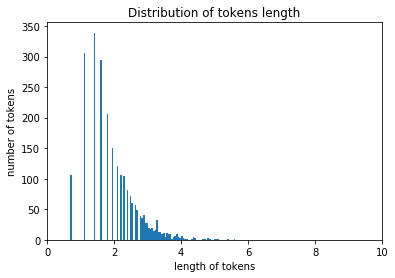

In [7]:
num_tokens = dataProcess.get_tokens_num_and_distribution(train_tokens)

## 获取填充后的训练数据和词嵌入矩阵（在放入keras训练的时候用到）

In [8]:
train_pad = dataProcess.tokens_process(train_tokens, num_tokens)

使用正太分布3δ法则可覆盖 0.9859154929577465


In [9]:
embedding_matrix = dataProcess.embedding_matrix

In [10]:
import numpy as np
train_target = np.array(train_target)
train_score = np.array(train_score)
train_pad.shape

(2485, 54)

In [11]:
train_target.shape

(2485,)

In [12]:
train_score.shape

(2485,)

In [14]:
train_score

array([5., 4., 1., ..., 5., 5., 5.])

## 进行训练和测试样本的分割

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.1,
                                                    random_state=12)

In [18]:
print("训练数据集数量：",X_train.shape, y_train.shape)
print("测试数据集数量：",X_test.shape, y_test.shape)

训练数据集数量： (2236, 54) (2236,)
测试数据集数量： (249, 54) (249,)


## 查看训练样本，确认无误

In [22]:
print(dataProcess.reverse_tokens(X_train[1]))
print('class: ',y_train[1])

                                      为什么不给出主函数的调用啊就给函数这些东西哪本书没有
class:  0
